# Image classification with MLP

In [1]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

import matplotlib.pyplot as plt
%matplotlib notebook

import warnings
warnings.filterwarnings("ignore")

import numpy as np
import random
from PIL import Image

import os

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

from sklearn.manifold import TSNE
import matplotlib.cm as cm

import pandas as pd
import seaborn as sns

import Mathematical_Morphology as morpho

In [2]:
import LettersNumbersClassification as LetNumClassif

[clf, X_train, X_test, y_train, y_test, dicClases] = LetNumClassif.train('../imgs/chars')

In [3]:
y_pred = clf.predict(X_test)

<IPython.core.display.Javascript object>


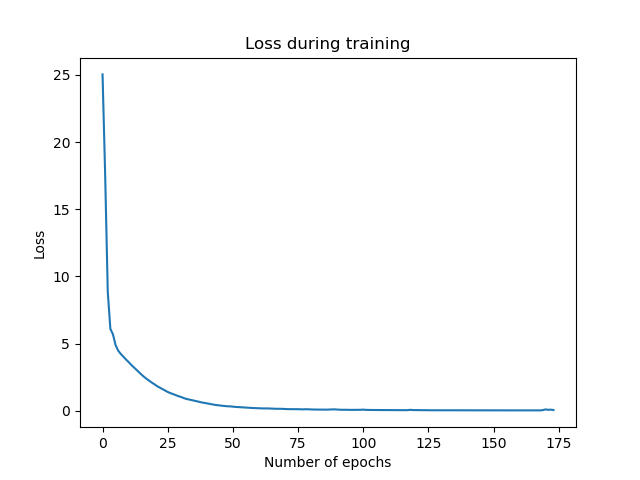

In [4]:
plt.figure()
plt.plot(clf.loss_curve_)
plt.title("Loss during training")
plt.ylabel("Loss")
plt.xlabel("Number of epochs")
plt.show()

In [5]:
print(y_test.argmax(axis=1)[0:10])
print(y_pred.argmax(axis=1)[0:10])

[34 19 29  8 16 33 11 22 13  6]
[34 19 29  0 16 33 11 22 13  6]


<IPython.core.display.Javascript object>


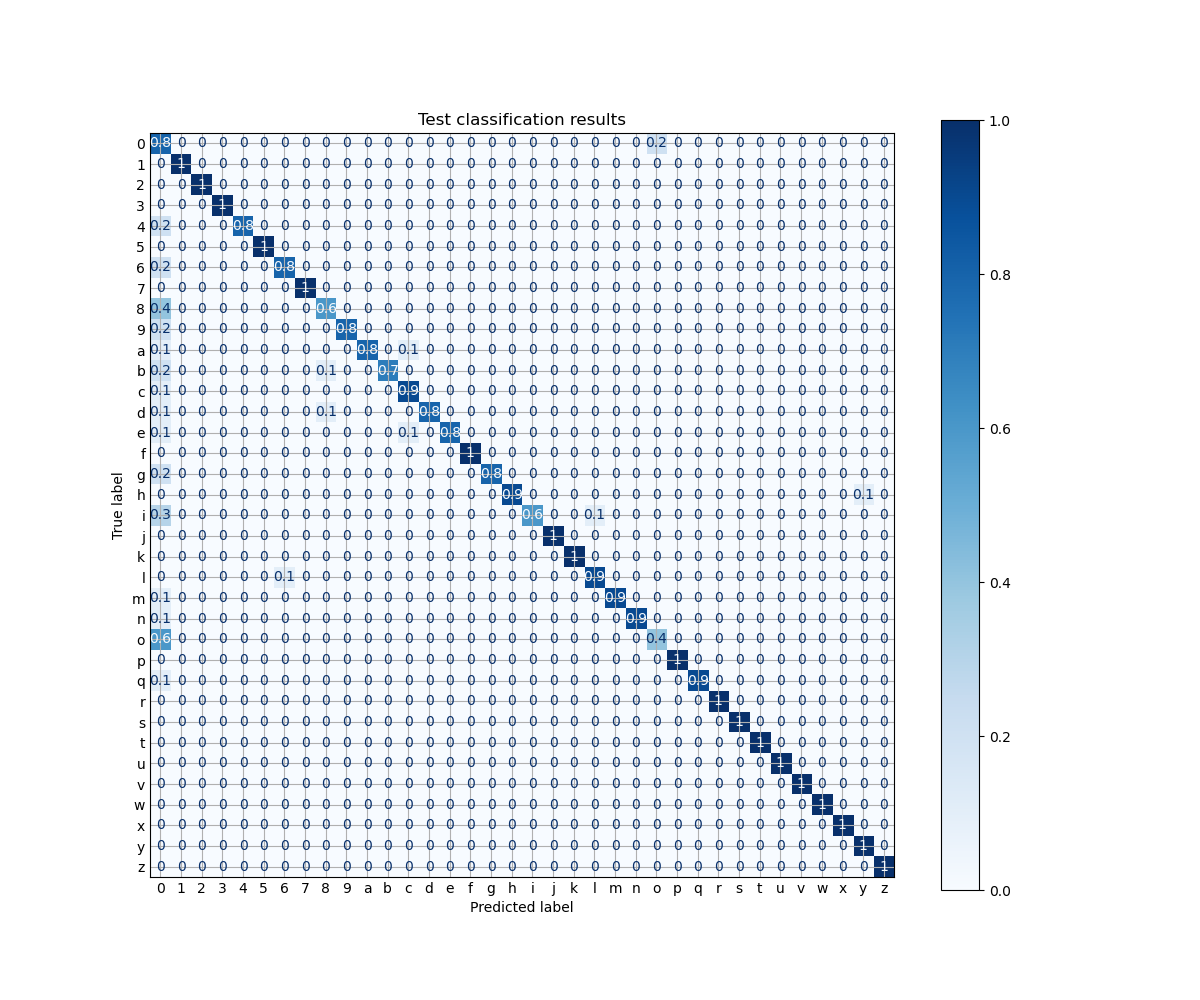

In [6]:
cmMT = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1), normalize='true')
cmd = ConfusionMatrixDisplay(cmMT, display_labels=list(dicClases.values()))

fig, ax = plt.subplots(figsize=(12,10))
cmd.plot(ax=ax, include_values=True, cmap='Blues', xticks_rotation='horizontal')

plt.title("Test classification results")
plt.tick_params(axis=u'both', which=u'both',length=0)
plt.grid(b=None)
plt.savefig('confusion_matrix.png', bbox_inches='tight')
plt.show()    

In [7]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average="macro")
recall = recall_score(y_test, y_pred, average="macro") 

print('Accuracy: ', round(accuracy, 4))
print('Precision: ', round(precision, 4))
print('Recall: ', round(recall, 4))

clases = list(dicClases.values())
ld = len(clases)
precision_class = precision_score(y_test, y_pred, average=None)[0:ld]
recall_class = recall_score(y_test, y_pred, average=None)[0:ld]

d = {'Class': clases, 'Precision': precision_class, 'Recall': recall_class}
df = pd.DataFrame(data=d)
print('\n\n')
print(df)

Accuracy:  0.8742
Precision:  0.9089
Recall:  0.873



   Class  Precision  Recall
0      0   0.375000     0.6
1      1   1.000000     1.0
2      2   1.000000     1.0
3      3   1.000000     1.0
4      4   1.000000     0.8
5      5   1.000000     1.0
6      6   0.800000     0.8
7      7   1.000000     1.0
8      8   0.600000     0.6
9      9   1.000000     0.8
10     a   1.000000     0.8
11     b   1.000000     0.8
12     c   0.818182     0.9
13     d   1.000000     0.9
14     e   1.000000     0.9
15     f   1.000000     1.0
16     g   1.000000     0.8
17     h   0.900000     0.9
18     i   1.000000     0.6
19     j   0.909091     1.0
20     k   1.000000     1.0
21     l   0.833333     1.0
22     m   1.000000     0.9
23     n   1.000000     0.9
24     o   0.666667     0.4
25     p   1.000000     1.0
26     q   1.000000     0.9
27     r   1.000000     1.0
28     s   0.909091     1.0
29     t   1.000000     1.0
30     u   1.000000     1.0
31     v   1.000000     1.0
32     w   1.000000  

### Export the MLP model

In [8]:
from joblib import dump

In [9]:
dump(clf, 'MLP.joblib')

['MLP.joblib']